In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import zipfile
import os

In [199]:
orders = pd.read_csv("data/northwind/orders.csv", sep=";")
order_details = pd.read_csv("data/northwind/order_details.csv", sep=";")
customers = pd.read_csv("data/northwind/customers.csv", sep=";")
products = pd.read_csv("data/northwind/products.csv", sep=";")
employees = pd.read_csv("data/northwind/employees.csv", sep=";")

In [200]:
print(f"O dataset orders tem {orders.shape[0]} linhas e {orders.shape[1]} colunas")

orders.head()

O dataset orders tem 830 linhas e 14 colunas


,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,NaN,44087,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium


In [201]:
orders.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          830 non-null    int64  
 1   customer_id       830 non-null    object 
 2   employee_id       830 non-null    int64  
 3   order_date        830 non-null    object 
 4   required_date     830 non-null    object 
 5   shipped_date      809 non-null    object 
 6   ship_via          830 non-null    int64  
 7   freight           830 non-null    float64
 8   ship_name         830 non-null    object 
 9   ship_address      830 non-null    object 
 10  ship_city         830 non-null    object 
 11  ship_region       323 non-null    object 
 12  ship_postal_code  811 non-null    object 
 13  ship_country      830 non-null    object 
dtypes: float64(1), int64(3), object(10)
memory usage: 90.9+ KB


In [202]:
orders.drop(columns=['ship_region', 'ship_postal_code', 'ship_via'], axis=1, inplace=True)

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       830 non-null    int64  
 1   customer_id    830 non-null    object 
 2   employee_id    830 non-null    int64  
 3   order_date     830 non-null    object 
 4   required_date  830 non-null    object 
 5   shipped_date   809 non-null    object 
 6   freight        830 non-null    float64
 7   ship_name      830 non-null    object 
 8   ship_address   830 non-null    object 
 9   ship_city      830 non-null    object 
 10  ship_country   830 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 71.5+ KB


In [203]:
orders["order_date"] = pd.to_datetime(orders["order_date"])
orders["required_date"] = pd.to_datetime(orders["required_date"])
orders["shipped_date"] = pd.to_datetime(orders["shipped_date"])

In [204]:
orders["order_year"] = orders["order_date"].dt.year
orders["year_month"] = orders["order_date"].dt.to_period("M")

orders[["order_year", "year_month"]]

,order_year,year_month
0,1996,1996-07
1,1996,1996-07
2,1996,1996-07
3,1996,1996-07
4,1996,1996-07
...,...,...
825,1998,1998-05
826,1998,1998-05
827,1998,1998-05
828,1998,1998-05


In [205]:
orders.isna().sum()

order_id          0
customer_id       0
employee_id       0
order_date        0
required_date     0
shipped_date     21
freight           0
ship_name         0
ship_address      0
ship_city         0
ship_country      0
order_year        0
year_month        0
dtype: int64

In [206]:
print(f"O dataset orders tem {order_details.shape[0]} linhas e {order_details.shape[1]} colunas")

order_details.head()

O dataset orders tem 2155 linhas e 5 colunas


,order_id,product_id,unit_price,quantity,discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


In [207]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    2155 non-null   int64  
 1   product_id  2155 non-null   int64  
 2   unit_price  2155 non-null   float64
 3   quantity    2155 non-null   int64  
 4   discount    2155 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 84.3 KB


In [208]:
print(f"O dataset order_details tem {customers.shape[0]} linhas e {customers.shape[1]} colunas")

customers.head()

O dataset order_details tem 91 linhas e 11 colunas


,customer_id,company_name,contact_name,contact_title,address,city,region,postal_code,country,phone,fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,NaN,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,NaN,05023,Mexico,(5) 555-3932,NaN
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,NaN,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,NaN,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [209]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    91 non-null     object
 1   company_name   91 non-null     object
 2   contact_name   91 non-null     object
 3   contact_title  91 non-null     object
 4   address        91 non-null     object
 5   city           91 non-null     object
 6   region         31 non-null     object
 7   postal_code    90 non-null     object
 8   country        91 non-null     object
 9   phone          91 non-null     object
 10  fax            69 non-null     object
dtypes: object(11)
memory usage: 7.9+ KB


In [210]:
customers.drop(columns=['fax', 'phone', 'region'], inplace=True)

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    91 non-null     object
 1   company_name   91 non-null     object
 2   contact_name   91 non-null     object
 3   contact_title  91 non-null     object
 4   address        91 non-null     object
 5   city           91 non-null     object
 6   postal_code    90 non-null     object
 7   country        91 non-null     object
dtypes: object(8)
memory usage: 5.8+ KB


In [211]:
customers['customer_id'].nunique()

91

In [212]:
print(f'O dataset products tem {products.shape[0]} linhas e {products.shape[1]} colunas')

products.head()

O dataset products tem 77 linhas e 10 colunas


,product_id,product_name,supplier_id,category_id,quantity_per_unit,unit_price,units_in_stock,units_on_order,reorder_level,discontinued
0,1,Chai,8,1,10 boxes x 30 bags,18.00,39,0,10,1
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,1
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [213]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         77 non-null     int64  
 1   product_name       77 non-null     object 
 2   supplier_id        77 non-null     int64  
 3   category_id        77 non-null     int64  
 4   quantity_per_unit  77 non-null     object 
 5   unit_price         77 non-null     float64
 6   units_in_stock     77 non-null     int64  
 7   units_on_order     77 non-null     int64  
 8   reorder_level      77 non-null     int64  
 9   discontinued       77 non-null     int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ KB


In [214]:
products['product_id'].nunique()

77

In [215]:
print(f'O dataset employees tem {employees.shape[0]} linhas e {employees.shape[1]} colunas')

employees.head()

O dataset employees tem 9 linhas e 18 colunas


,employee_id,last_name,first_name,title,title_of_courtesy,birth_date,hire_date,address,city,region,postal_code,country,home_phone,extension,photo,notes,reports_to,photo_path
0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.\nApt. 2A,Seattle,WA,98122,USA,(206) 555-9857,5467,\x,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1952-02-19,1992-08-14,908 W. Capital Way,Tacoma,WA,98401,USA,(206) 555-9482,3457,\x,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1963-08-30,1992-04-01,722 Moss Bay Blvd.,Kirkland,WA,98033,USA,(206) 555-3412,3355,\x,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1937-09-19,1993-05-03,4110 Old Redmond Rd.,Redmond,WA,98052,USA,(206) 555-8122,5176,\x,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1955-03-04,1993-10-17,14 Garrett Hill,London,NaN,SW1 8JR,UK,(71) 555-4848,3453,\x,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


In [216]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        9 non-null      int64  
 1   last_name          9 non-null      object 
 2   first_name         9 non-null      object 
 3   title              9 non-null      object 
 4   title_of_courtesy  9 non-null      object 
 5   birth_date         9 non-null      object 
 6   hire_date          9 non-null      object 
 7   address            9 non-null      object 
 8   city               9 non-null      object 
 9   region             5 non-null      object 
 10  postal_code        9 non-null      object 
 11  country            9 non-null      object 
 12  home_phone         9 non-null      object 
 13  extension          9 non-null      int64  
 14  photo              9 non-null      object 
 15  notes              9 non-null      object 
 16  reports_to         8 non-null 

In [217]:
employees['employee_id'].nunique()

9

In [218]:
df_1 = pd.merge(order_details, orders, on='order_id', how='inner')
df_1 = pd.merge(df_1, products, on='product_id', how='inner')
df_1 = pd.merge(df_1, customers, on='customer_id', how='inner')



print(f'linhas: {df_1.shape[0]} colunas: {df_1.shape[1]}')
df_1.columns

linhas: 2155 colunas: 33


Index(['order_id', 'product_id', 'unit_price_x', 'quantity', 'discount',
       'customer_id', 'employee_id', 'order_date', 'required_date',
       'shipped_date', 'freight', 'ship_name', 'ship_address', 'ship_city',
       'ship_country', 'order_year', 'year_month', 'product_name',
       'supplier_id', 'category_id', 'quantity_per_unit', 'unit_price_y',
       'units_in_stock', 'units_on_order', 'reorder_level', 'discontinued',
       'company_name', 'contact_name', 'contact_title', 'address', 'city',
       'postal_code', 'country'],
      dtype='object')

In [219]:
northwind = (df_1.drop(columns=['unit_price_y']).rename(columns={'unit_price_x':'unit_price'}))

northwind.head()

,order_id,product_id,unit_price,quantity,discount,customer_id,employee_id,order_date,required_date,shipped_date,...,units_on_order,reorder_level,discontinued,company_name,contact_name,contact_title,address,city,postal_code,country
0,10248,11,14.0,12,0.0,VINET,5,1996-07-04,1996-08-01,1996-07-16,...,30,30,0,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,59 rue de l'Abbaye,Reims,51100,France
1,10248,42,9.8,10,0.0,VINET,5,1996-07-04,1996-08-01,1996-07-16,...,0,0,1,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,59 rue de l'Abbaye,Reims,51100,France
2,10248,72,34.8,5,0.0,VINET,5,1996-07-04,1996-08-01,1996-07-16,...,0,0,0,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,59 rue de l'Abbaye,Reims,51100,France
3,10249,14,18.6,9,0.0,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,...,0,0,0,Toms Spezialitäten,Karin Josephs,Marketing Manager,Luisenstr. 48,Münster,44087,Germany
4,10249,51,42.4,40,0.0,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,...,0,10,0,Toms Spezialitäten,Karin Josephs,Marketing Manager,Luisenstr. 48,Münster,44087,Germany


Removi a coluna 'unit_price_y' pois ela pode não refletir o valor da venda na hora de order_details.

### *Gerando métricas*

In [220]:
northwind['total_item'] = northwind['unit_price'] * northwind['quantity'] * (1 - northwind['discount'])

monthly_revenue = northwind['total_item'].sum()

mean_ticket = monthly_revenue / northwind['order_id'].nunique()

print(f'O ticket médio da empresa é de {mean_ticket.round(2)}')

O ticket médio da empresa é de 1525.05


Agora, o ticket médio mensal da empresa

In [221]:
monthly_revenue = northwind.groupby('year_month')['total_item'].sum()

monthly_orders = northwind.groupby('year_month')['order_id'].nunique()

monthly_ticket = monthly_revenue / monthly_orders

monthly_mean_ticket = monthly_ticket.mean()

Receita total mensal

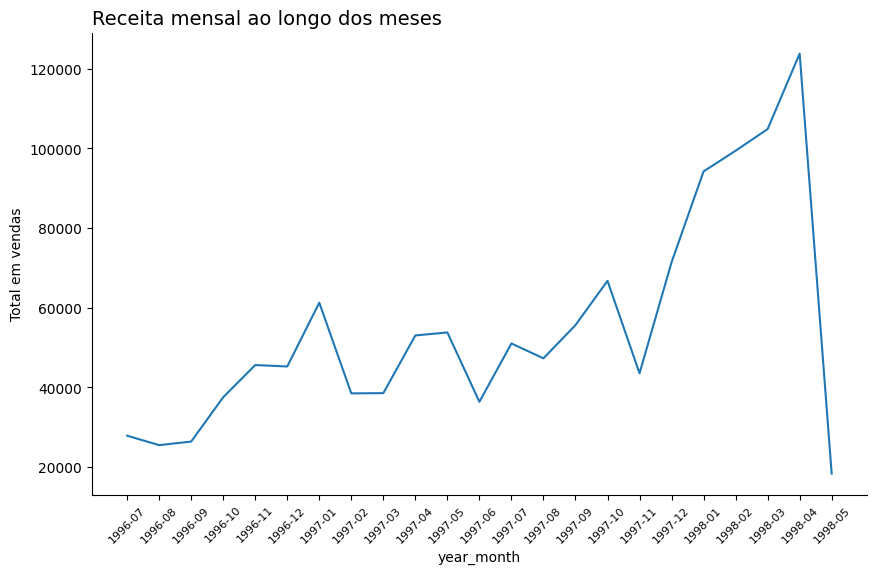

In [222]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.lineplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values)
ax.set_title("Receita mensal ao longo dos meses", loc='left', fontsize=14)
ax.set_ylabel("Total em vendas")
ax.tick_params(axis='x', rotation=45, labelsize=8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Plotando o gráfico do ticket mensal

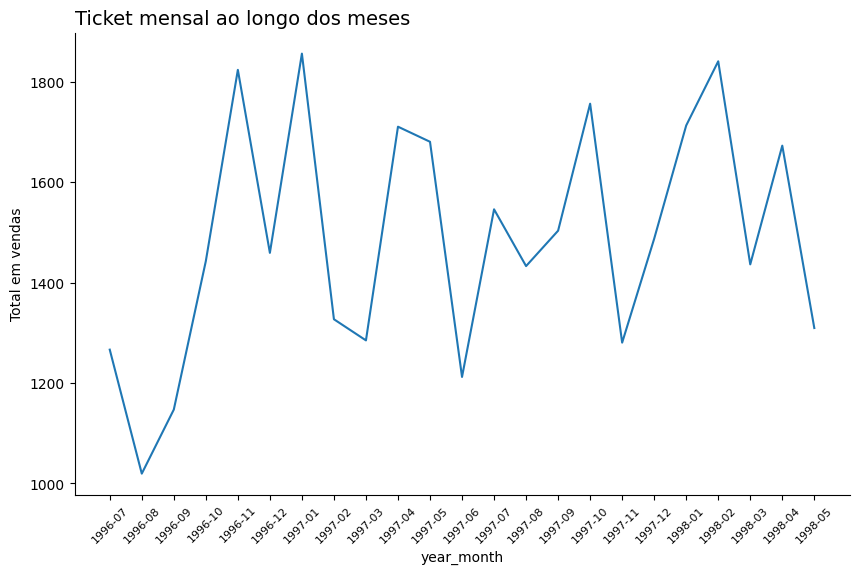

In [223]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.lineplot(x=monthly_ticket.index.astype(str), y=monthly_ticket.values)
ax.set_title("Ticket mensal ao longo dos meses", loc='left', fontsize=14)
ax.set_ylabel("Total em vendas")
ax.tick_params(axis='x', rotation=45, labelsize=8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [224]:
northwind.groupby("year_month")["order_id"].nunique()

year_month
1996-07    22
1996-08    25
1996-09    23
1996-10    26
1996-11    25
1996-12    31
1997-01    33
1997-02    29
1997-03    30
1997-04    31
1997-05    32
1997-06    30
1997-07    33
1997-08    33
1997-09    37
1997-10    38
1997-11    34
1997-12    48
1998-01    55
1998-02    54
1998-03    73
1998-04    74
1998-05    14
Freq: M, Name: order_id, dtype: int64

In [225]:
clientes_totais = set(customers['customer_id'].unique())

clientes_com_pedidos = set(northwind['customer_id'].unique())

clientes_sem_pedido = clientes_totais - clientes_com_pedidos

print(f"Clientes sem pedido: {clientes_sem_pedido}")


Clientes sem pedido: {'FISSA', 'PARIS'}


In [226]:
top_products = northwind.groupby('product_name')['total_item'].sum()

top_5_products = top_products.sort_values(ascending=False).head(5).round(2)

top_5_products

product_name
Côte de Blaye              141396.73
Thüringer Rostbratwurst     80368.67
Raclette Courdavault        71155.70
Tarte au sucre              47234.97
Camembert Pierrot           46825.48
Name: total_item, dtype: float64

C:\Users\raul.araujo\AppData\Local\Temp\ipykernel_11812\2252617133.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_5_products.values, y=top_5_products.index, palette=cores)


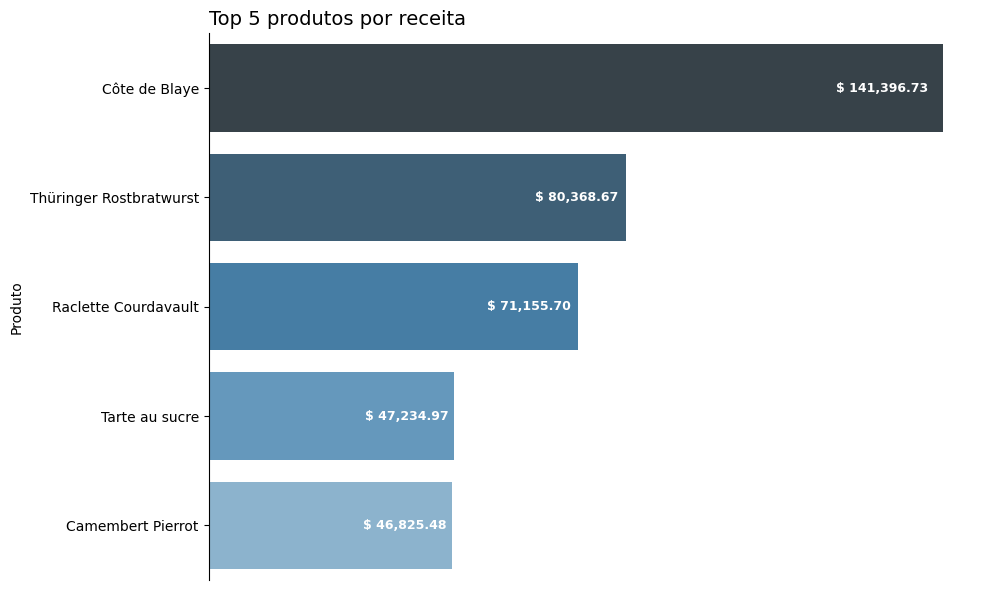

In [227]:
fig, ax = plt.subplots(figsize=(10,6))

# Invertendo a paleta de cores para valores mais altos ficarem mais escuros e mais baixos ficarem mais claros
cores = sns.color_palette("Blues_d", n_colors=10)[::-2]

ax = sns.barplot(x=top_5_products.values, y=top_5_products.index, palette=cores)

for i, (valor, nome) in enumerate(zip(top_5_products.values, top_5_products.index)):
    ax.text(valor * 0.98, i, f"$ {valor:,.2f}", ha='right', va='center', color='white', fontsize=9, fontweight='bold')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_title("Top 5 produtos por receita", loc='left', fontsize=14)
ax.set_ylabel("Produto")

ax.xaxis.set_visible(False)

plt.tight_layout()
plt.show()



In [228]:
top_categories = northwind.groupby('category_id')['total_item'].sum()

top_5_categories = top_categories.sort_values(ascending=False).head(5).round(2)

top_5_categories

category_id
1    267868.18
4    234507.28
3    167357.22
6    163022.36
8    131261.74
Name: total_item, dtype: float64

In [230]:
print(top_5_categories)
print(top_5_categories.shape)


category_id
1    267868.18
4    234507.28
3    167357.22
6    163022.36
8    131261.74
Name: total_item, dtype: float64
(5,)


In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confirma que a variável tem no máximo 5 elementos
top_5_categories = top_5_categories.sort_values(ascending=False).head(5)

fig, ax = plt.subplots(figsize=(10, 6))

cores = sns.color_palette("Blues_d", n_colors=len(top_5_categories))[::-1]

sns.barplot(x=top_5_categories.values, y=top_5_categories.index, palette=cores, ax=ax)

for i, (valor, nome) in enumerate(zip(top_5_categories.values, top_5_categories.index)):
    ax.text(valor * 0.98, i, f"$ {valor:,.2f}", ha='right', va='center', color='white', fontsize=9, fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_title("Top 5 categorias por receita", loc='left', fontsize=14)
ax.set_ylabel("Categoria")
ax.set_xlabel("")
ax.xaxis.set_visible(False)

plt.tight_layout()
plt.show()


C:\Users\raul.araujo\AppData\Local\Temp\ipykernel_11812\318129623.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_categories.values, y=top_5_categories.index, palette=cores, ax=ax)
C:\Users\raul.araujo\AppData\Local\Temp\ipykernel_11812\318129623.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


ValueError: Image size of 40689312x513 pixels is too large. It must be less than 2^23 in each direction.

<Figure size 1000x600 with 1 Axes>